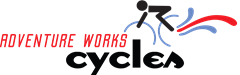
# <center>Business Analytics Preliminary Analysis Tasks</center>

## We have 2 files...
- AWInternetSales.csv
- sales.csv

In [2]:
ls ..\Data\

 Volume in drive D is DATADRIVE0
 Volume Serial Number is E6D7-EDE3

 Directory of D:\DocumentsD\Bryant\PythonAnalytics\Week5\Data

03/05/2019  09:38 AM    <DIR>          .
03/05/2019  09:38 AM    <DIR>          ..
10/20/2018  08:50 AM        11,721,072 AWInternetSales.csv
03/05/2019  09:38 AM            85,557 AWProduct_excel.xlsx
               2 File(s)     11,806,629 bytes
               2 Dir(s)  793,233,231,872 bytes free


## Dataframe Naming Conventions:

After awhile we will have a lot of code so having a consistent naming convention makes it easier for us to keep track of what we are doing.  We will use the following standard.

- All characters will be lower case.
- First two characters will be df to indicate it is a dataframe.
- The rest of the name will be taken from the file or table we are loading without prefixes like dim and fact, i.e. DimGeography.csv will just use geography.

Example: DimGeography.csv will be loaded into dataframe dfgeography.

## Let's start by loading the customer data...

In [2]:
import pandas as pd

filepath = '../Data/'

## 1. Load FactInternetSales.csv into a dataframe using the same basic syntax as above.

In [3]:
dfinternetsales = pd.read_csv(filepath + 'AWInternetSales.csv')
dfinternetsales.head()

ProductKey  OrderDateKey  DueDateKey  ShipDateKey  CustomerKey  \
0         310      20101229    20110110     20110105        21768   
1         346      20101229    20110110     20110105        28389   
2         346      20101229    20110110     20110105        25863   
3         336      20101229    20110110     20110105        14501   
4         346      20101229    20110110     20110105        11003   

   PromotionKey  CurrencyKey  SalesTerritoryKey SalesOrderNumber  \
0             1           19                  6          SO43697   
1             1           39                  7          SO43698   
2             1          100                  1          SO43699   
3             1          100                  4          SO43700   
4             1            6                  9          SO43701   

   SalesOrderLineNumber           ...             ProductStandardCost  \
0                     1           ...                       2171.2942   
1                     1           ...                       1912.1544   
2                     1           ...                       1912.1544   
3                     1           ...                        413.1463   
4                     1           ...                       1912.1544   

   TotalProductCost  SalesAmount    TaxAmt  Freight  CarrierTrackingNumber  \
0         2171.2942    3578.2700  286.2616  89.4568                    NaN   
1         1912.1544    3399.9900  271.9992  84.9998                    NaN   
2         1912.1544    3399.9900  271.9992  84.9998                    NaN   
3          413.1463     699.0982   55.9279  17.4775                    NaN   
4         1912.1544    3399.9900  271.9992  84.9998                    NaN   

   CustomerPONumber                OrderDate                  DueDate  \
0               NaN  2010-12-29 00:00:00.000  2011-01-10 00:00:00.000   
1               NaN  2010-12-29 00:00:00.000  2011-01-10 00:00:00.000   
2               NaN  2010-12-29 00:00:00.000  2011-01-10 00:00:00.000   
3               NaN  2010-12-29 00:00:00.000  2011-01-10 00:00:00.000   
4               NaN  2010-12-29 00:00:00.000  2011-01-10 00:00:00.000   

                  ShipDate  
0  2011-01-05 00:00:00.000  
1  2011-01-05 00:00:00.000  
2  2011-01-05 00:00:00.000  
3  2011-01-05 00:00:00.000  
4  2011-01-05 00:00:00.000  

[5 rows x 26 columns]

In [8]:
# It helps to know what the columns are so...
dfinternetsales.dtypes

ProductKey                 int64
OrderDateKey               int64
DueDateKey                 int64
ShipDateKey                int64
CustomerKey                int64
PromotionKey               int64
CurrencyKey                int64
SalesTerritoryKey          int64
SalesOrderNumber          object
SalesOrderLineNumber       int64
RevisionNumber             int64
OrderQuantity              int64
UnitPrice                float64
ExtendedAmount           float64
UnitPriceDiscountPct       int64
DiscountAmount             int64
ProductStandardCost      float64
TotalProductCost         float64
SalesAmount              float64
TaxAmt                   float64
Freight                  float64
CarrierTrackingNumber    float64
CustomerPONumber         float64
OrderDate                 object
DueDate                   object
ShipDate                  object
dtype: object

## 2) Dropping columns we don't want.

In [11]:
# We don't need all these columns to let's drop CarrierTrackingNumber and CustomerPONumber.
#    !!! Note:  You must reassing the dataframe variable to the result.  It does not change in place. !!!

# Useful link: https://cmdlinetips.com/2018/04/how-to-drop-one-or-more-columns-in-pandas-dataframe/

dfinternetsales = dfinternetsales.drop(['CarrierTrackingNumber', 'CustomerPONumber'], axis=1)
dfinternetsales.dtypes

ProductKey                int64
OrderDateKey              int64
DueDateKey                int64
ShipDateKey               int64
CustomerKey               int64
PromotionKey              int64
CurrencyKey               int64
SalesTerritoryKey         int64
SalesOrderNumber         object
SalesOrderLineNumber      int64
RevisionNumber            int64
OrderQuantity             int64
UnitPrice               float64
ExtendedAmount          float64
UnitPriceDiscountPct      int64
DiscountAmount            int64
ProductStandardCost     float64
TotalProductCost        float64
SalesAmount             float64
TaxAmt                  float64
Freight                 float64
OrderDate                object
DueDate                  object
ShipDate                 object
dtype: object

## 3. Replace column names

In [12]:
#  Replace column names - https://cmdlinetips.com/2018/03/how-to-change-column-names-and-row-indexes-in-pandas/

salescolnames = ["SalesPersonID","FirstName","LastName","TotalSales","AsOfDate","SentDate"]
salescolnames

['SalesPersonID',
 'FirstName',
 'LastName',
 'TotalSales',
 'AsOfDate',
 'SentDate']

In [33]:
dfsales = pd.read_csv(filepath + 'sales.csv', header=None)
dfsales

0      1           2         3           4           5
0   6    Tom       Smith  100000.0  2014-03-27  2014-07-08
1   7  Betty  Lucination       NaN  2014-03-27  2014-07-08
2   8    Joe        Fits     110.0  2014-03-27  2014-07-08
3   9   Mary    Attricks    2500.0  2014-03-27  2014-07-08
4  10  Holly         Day       NaN  2014-03-27  2014-07-08

In [34]:
dfsales.columns = salescolnames
dfsales.head()

SalesPersonID FirstName    LastName  TotalSales    AsOfDate    SentDate
0              6       Tom       Smith    100000.0  2014-03-27  2014-07-08
1              7     Betty  Lucination         NaN  2014-03-27  2014-07-08
2              8       Joe        Fits       110.0  2014-03-27  2014-07-08
3              9      Mary    Attricks      2500.0  2014-03-27  2014-07-08
4             10     Holly         Day         NaN  2014-03-27  2014-07-08

## 4. Changing the index.

In [35]:
# Change the index.

#  !!!! Be careful to retain the column for future reference  !!!

dfsales.set_index('SalesPersonID', inplace=True, drop=False)

## 5. Get list of columns with data types.

In [38]:
# Get a list of column names with data types...

dfsales.dtypes

SalesPersonID      int64
FirstName         object
LastName          object
TotalSales       float64
AsOfDate          object
SentDate          object
dtype: object

## 6. Slicing data...

In [43]:
#  Use the loc method to select by index values...
dfsales.loc[8:9]

SalesPersonID FirstName  LastName  TotalSales    AsOfDate  \
SalesPersonID                                                              
8                          8       Joe      Fits       110.0  2014-03-27   
9                          9      Mary  Attricks      2500.0  2014-03-27   

                 SentDate  
SalesPersonID              
8              2014-07-08  
9              2014-07-08

In [45]:
# Use iloc to select by subscript (row number) starting at zero.

dfsales.iloc[1:4]

SalesPersonID FirstName    LastName  TotalSales    AsOfDate  \
SalesPersonID                                                                
7                          7     Betty  Lucination         NaN  2014-03-27   
8                          8       Joe        Fits       110.0  2014-03-27   
9                          9      Mary    Attricks      2500.0  2014-03-27   

                 SentDate  
SalesPersonID              
7              2014-07-08  
8              2014-07-08  
9              2014-07-08

## 7. Changing the index.

In [49]:
# Use the copy() method to get another copy of the dataframe...

dfnew = dfsales.copy()
dfnew
dfnew.set_index('AsOfDate', inplace=True)
dfnew

SalesPersonID FirstName    LastName  TotalSales    SentDate
AsOfDate                                                               
2014-03-27              6       Tom       Smith    100000.0  2014-07-08
2014-03-27              7     Betty  Lucination         NaN  2014-07-08
2014-03-27              8       Joe        Fits       110.0  2014-07-08
2014-03-27              9      Mary    Attricks      2500.0  2014-07-08
2014-03-27             10     Holly         Day         NaN  2014-07-08

In [50]:
dfsales  # is unaffected

SalesPersonID FirstName    LastName  TotalSales    AsOfDate  \
SalesPersonID                                                                
6                          6       Tom       Smith    100000.0  2014-03-27   
7                          7     Betty  Lucination         NaN  2014-03-27   
8                          8       Joe        Fits       110.0  2014-03-27   
9                          9      Mary    Attricks      2500.0  2014-03-27   
10                        10     Holly         Day         NaN  2014-03-27   

                 SentDate  
SalesPersonID              
6              2014-07-08  
7              2014-07-08  
8              2014-07-08  
9              2014-07-08  
10             2014-07-08

## 8. Saving output to a file.

In [58]:
# Writing output to files...

filename = filepath + 'analysisout.csv'

dfnew.to_csv(filename, sep=',')

In [53]:
ls ..\data

 Volume in drive D is DATADRIVE0
 Volume Serial Number is E6D7-EDE3

 Directory of D:\DocumentsD\Bryant\PythonAnalytics\Week5\data

03/05/2019  01:02 PM    <DIR>          .
03/05/2019  01:02 PM    <DIR>          ..
03/05/2019  01:02 PM               273 analysisout.csv
10/20/2018  08:50 AM        11,721,072 AWInternetSales.csv
03/05/2019  09:38 AM            85,557 AWProduct_excel.xlsx
03/05/2019  12:30 PM               204 sales.csv
               4 File(s)     11,807,106 bytes
               2 Dir(s)  793,232,666,624 bytes free


In [66]:
# Use this function to search for any files which match your filename

# https://stackoverflow.com/questions/40375366/pandas-to-csv-checking-for-overwrite

# You can use this to avoid overwriting files...

def check_for_file (path, filename):

    import glob
    
    fullpath = path + filename 

    files_present = glob.glob(fullpath)

    # if no matching files, write to csv, if there are matching files, print statement
    if not files_present:
        return False
    else:
        return True
        
print('File does not exist: ', check_for_file (filepath, 'xx.csv')) 
print('File does exist: ', check_for_file (filepath, 'analysisout.csv'))

File does not exist:  False
File does exist:  True


## 9. How many rows and columns?

In [68]:
# How many rows and columns are in the dataframe?

dfinternetsales.shape

(60398, 24)

##  10.  Null values can cause problems with data analysis so let's consider how to identify and handle them.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html

In [72]:
dfsales.isnull()
#dfsales

SalesPersonID FirstName LastName TotalSales AsOfDate SentDate
SalesPersonID                                                              
6                     False     False    False      False    False    False
7                     False     False    False       True    False    False
8                     False     False    False      False    False    False
9                     False     False    False      False    False    False
10                    False     False    False       True    False    False

In [73]:
dfsales['TotalSales'].isnull

<bound method NDFrame.isnull of SalesPersonID
6     100000.0
7          NaN
8        110.0
9       2500.0
10         NaN
Name: TotalSales, dtype: float64>

In [76]:
#  This will return rows with a null column value but not change the dataframe.

dfsales.dropna()

SalesPersonID FirstName  LastName  TotalSales    AsOfDate  \
SalesPersonID                                                              
6                          6       Tom     Smith    100000.0  2014-03-27   
8                          8       Joe      Fits       110.0  2014-03-27   
9                          9      Mary  Attricks      2500.0  2014-03-27   

                 SentDate  
SalesPersonID              
6              2014-07-08  
8              2014-07-08  
9              2014-07-08

In [80]:
dfsales.dropna(how='all')  # no row has all null values

SalesPersonID FirstName    LastName  TotalSales    AsOfDate  \
SalesPersonID                                                                
6                          6       Tom       Smith    100000.0  2014-03-27   
7                          7     Betty  Lucination         NaN  2014-03-27   
8                          8       Joe        Fits       110.0  2014-03-27   
9                          9      Mary    Attricks      2500.0  2014-03-27   
10                        10     Holly         Day         NaN  2014-03-27   

                 SentDate  
SalesPersonID              
6              2014-07-08  
7              2014-07-08  
8              2014-07-08  
9              2014-07-08  
10             2014-07-08

In [82]:
dfsales.dropna(subset=['TotalSales', 'AsOfDate'])

SalesPersonID FirstName  LastName  TotalSales    AsOfDate  \
SalesPersonID                                                              
6                          6       Tom     Smith    100000.0  2014-03-27   
8                          8       Joe      Fits       110.0  2014-03-27   
9                          9      Mary  Attricks      2500.0  2014-03-27   

                 SentDate  
SalesPersonID              
6              2014-07-08  
8              2014-07-08  
9              2014-07-08

In [77]:
# Dataframe still has the rows.
dfsales

SalesPersonID FirstName    LastName  TotalSales    AsOfDate  \
SalesPersonID                                                                
6                          6       Tom       Smith    100000.0  2014-03-27   
7                          7     Betty  Lucination         NaN  2014-03-27   
8                          8       Joe        Fits       110.0  2014-03-27   
9                          9      Mary    Attricks      2500.0  2014-03-27   
10                        10     Holly         Day         NaN  2014-03-27   

                 SentDate  
SalesPersonID              
6              2014-07-08  
7              2014-07-08  
8              2014-07-08  
9              2014-07-08  
10             2014-07-08

In [79]:
#  The inpace=True removes the rows from the dataframe for real!
dfsales2 = dfsales.copy()
dfsales2.dropna(inplace=True)
dfsales2

SalesPersonID FirstName  LastName  TotalSales    AsOfDate  \
SalesPersonID                                                              
6                          6       Tom     Smith    100000.0  2014-03-27   
8                          8       Joe      Fits       110.0  2014-03-27   
9                          9      Mary  Attricks      2500.0  2014-03-27   

                 SentDate  
SalesPersonID              
6              2014-07-08  
8              2014-07-08  
9              2014-07-08

## 11.  Show the average, lowest, highest, quartiles (25%, 50%, 75%), count of Yearly Income.  Note: the 50% quarile value is also the median.

In [91]:
print(dfsales.describe())
print('')
print(dfsales['TotalSales'].describe())

       SalesPersonID     TotalSales
count       5.000000       3.000000
mean        8.000000   34203.333333
std         1.581139   56994.114024
min         6.000000     110.000000
25%         7.000000    1305.000000
50%         8.000000    2500.000000
75%         9.000000   51250.000000
max        10.000000  100000.000000

count         3.000000
mean      34203.333333
std       56994.114024
min         110.000000
25%        1305.000000
50%        2500.000000
75%       51250.000000
max      100000.000000
Name: TotalSales, dtype: float64


# 12. Do a histogram 

Help on histograms: https://statistics.laerd.com/statistical-guides/understanding-histograms.php

<IPython.core.display.Javascript object>


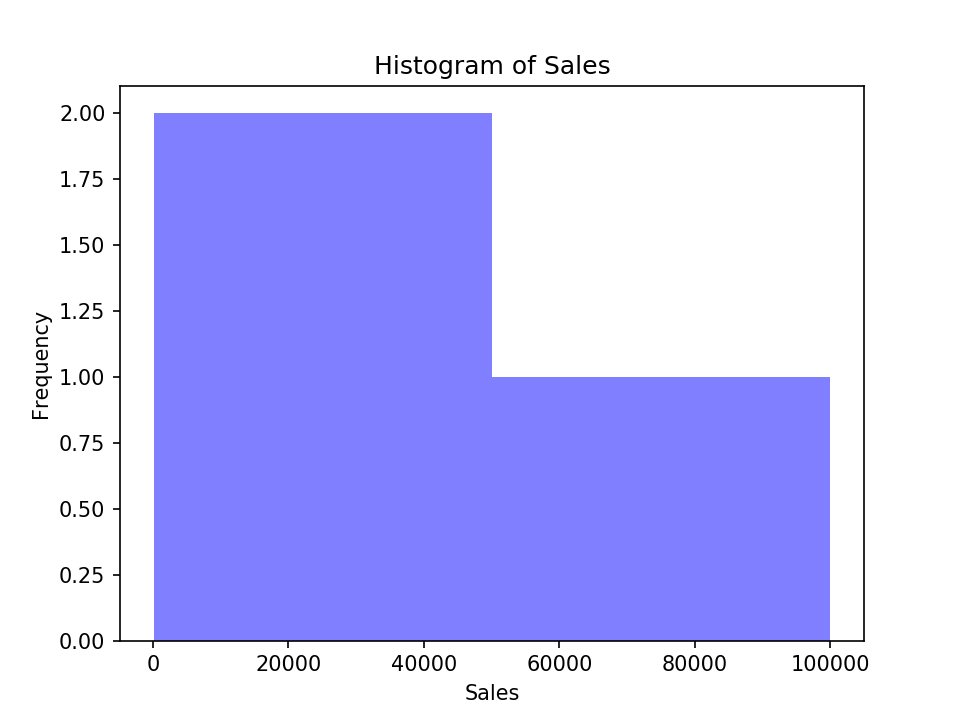

C:\Users\Bryan\Documents\Anaconda64\lib\site-packages\numpy\lib\function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Bryan\Documents\Anaconda64\lib\site-packages\numpy\lib\function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


In [94]:
%matplotlib notebook
# https://pythonspot.com/matplotlib-histogram/

import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
 
num_bins = 2
n, bins, patches = plt.hist(dfsales['TotalSales'], num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title(r'Histogram of Sales')
plt.show()

## 13. Create a new column that creates 2 groupings of sales. low and high.


See this link for help https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.cut.html

In [12]:
dfinternetsales['SalesLevel'] = 'low'
dfinternetsales['SalesLevel'][dfinternetsales['SalesAmount'] > 3500] = 'high'
dfinternetsales[['SalesAmount','SalesLevel']].head()

C:\Users\Bryan\Documents\Anaconda64\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


SalesAmount SalesLevel
0    3578.2700       high
1    3399.9900        low
2    3399.9900        low
3     699.0982        low
4    3399.9900        low

## 11.  It would be useful to know the age of the sales orders.  Using the function below, create a column that holds the age in months of orders.

In [165]:
# Calculating birthdate using function with apply...
from datetime import date

def calculate_age(born):
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

#dfcustomer['age'] = calculate_age(dfcustomer['BirthDate2'])
dfcustomer['BirthDate2'].apply(calculate_age).head()

0    47
1    42
2    48
3    45
4    39
Name: BirthDate2, dtype: int64

In [100]:
dfcustomer['ageindays'] = date.today() - dfcustomer['BirthDate2']

In [149]:
# Calculate years rounding the result...
pd.to_numeric(((dfcustomer['ageindays'].dt.days)/365).round(0), downcast='integer').head()

0    47
1    43
2    48
3    46
4    40
Name: ageindays, dtype: int8

In [147]:
# Calculate years truncating the decimal...
((dfcustomer['ageindays'].dt.days)/365).astype('int64').head()

0    47
1    42
2    48
3    45
4    39
Name: ageindays, dtype: int64

In [150]:
dfcustomer['age'] = ((dfcustomer['ageindays'].dt.days)/365).astype('int64')

In [154]:
dfcustomer[['BirthDate','age']].head()

BirthDate  age
0  1971-10-06   47
1  1976-05-10   42
2  1971-02-09   48
3  1973-08-14   45
4  1979-08-05   39

In [60]:
dfcustomer['BirthDate'].dtype

dtype('O')

In [67]:
dfcustomer['BirthDate2'] = pd.DatetimeIndex(dfcustomer['BirthDate']).date

In [70]:
(pd.to_datetime('today').year-pd.to_datetime('1956-07-01').year)

63

## 12.  Individual ages are not very helpful but knowing the age groups of our customers is so let's create age bands as follows...
https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.cut.html

- Less than 20
- 20 - 29
- 30 - 39
- 40 - 49
- 50 - 59
- Greater than or equal to 60

## 13.  Display a count of customers in each of the above grouping in the order of grouping defined above, i.e. from youngest to oldest.

## 14. While the customer age profile is interesting, what we really need to know is how that relates to sales volume.  Join the Customers to the InternetSales dataframe and display the total sales volume, and count of orders, by the customer age bands.

## 15.  A picture is worth a thousands words so lets visualize just the total sales by the customer age band, i.e. a bar for total sales for each age band.  Make the bar blue.

In [14]:
dfcustomer.dtypes

CustomerKey               int64
GeographyKey              int64
CustomerAlternateKey     object
Title                    object
FirstName                object
MiddleName               object
LastName                 object
NameStyle                 int64
BirthDate                object
MaritalStatus            object
Suffix                   object
Gender                   object
EmailAddress             object
YearlyIncome            float64
TotalChildren             int64
NumberChildrenAtHome      int64
EnglishEducation         object
SpanishEducation         object
FrenchEducation          object
EnglishOccupation        object
SpanishOccupation        object
FrenchOccupation         object
HouseOwnerFlag            int64
NumberCarsOwned           int64
AddressLine1             object
AddressLine2             object
Phone                    object
DateFirstPurchase        object
CommuteDistance          object
dtype: object

### 16.  What age band has the most of our customers in it?

dfgeography.dtypes

## 17.  We would like to know where our customers live and fortunately, the customer dataframe has the key to the geography dataframe so we can join them to find out.  Join the customer dataframe to the geography dataframe using the GeographyKey. from datetime import date.  Then display a count of customers grouped by CountryRegionName.  

## 18.  Visualize the above customer count by CountryRegionName in a pie chart.

In [24]:
dfcustomer.CommuteDistance  cc

SyntaxError: invalid syntax (<ipython-input-24-2600a1ce2c14>, line 1)

## 19.  Since AdventureWorks sells bicycles, it might be interesting to see if customers may buy bikes to ride to work.  Although we need for collaborative information, let's see if the work commute distance hints at an answer.  A shorter commute could mean they are using a bike from us. Taking a guess, 5 miles seems like a reasonable commute by bike so lets count the number of customers as follows:

- 5 mile or less commute
- More than 5 miles.

## 20.  Let's take the above information about the commute and combine it with gender to see if there is a difference between which group may use a bike to commute to work.  Let's create a bar chart that shows a count of Men with 5 mile or less commute, Men with More than 5 miles, Women with 5 mile or less commute, and Women with more than 5 miles.  